# 前書き

本コースでは、Pythonを⽤いて機械学習分野において下記について学ぶ。

- 教師あり学習
- 教師なし学習
- 機械学習アルゴリズム
- 画像処理
- ⾃然⾔語処理
- Deep Learning

今回は主に教師あり学習の基礎と基本的な機械学習アルゴリズムについて学ぶ。

# 1. 機械学習とは

機械学習はデータの中から⾃動的に規則等を抽出し、

予測や分類といった特定の⽬的を達成する技術である。

機械学習の分野を⼤きく分けると、下記３つの分野
に分かれている。

- 教師あり学習
- 教師なし学習
- 強化学習

それぞれの分野で様々な学習アルゴリズムがある。

## 1-1. 教師あり学習とは

教師あり学習は答え付きのデータを与えて、
未知のデータに対する予測モデルを構築する分野である。

答えのデータを⽬的変数、⽬的変数を予測するために使うデータを説明変数や特徴量と呼ぶ。

迷惑メールか否かの分類や、株価の予測といったタスクがこれにあたる。


## 1-2. 教師なし学習とは

教師なし学習は答えのないデータを与え、データを類似グループに分けたり、データ間の関係性を獲得するといったことを⾏う分野である。

マーケティング活動におけるユーザーのグループ分けや購買データ分析における商品推薦（レコメンド）といったタスクに活⽤される。

## 1-3. 強化学習とは

強化学習は機械による⼀連の⾏動に対して報酬を設計し、⾃動的に⾏動ルールを獲得することを⽬的とした分野である。

囲碁や将棋などで⾔うと、強化学習を⽤いて"勝ちに繋がる⼿の選択"を⾃動的に獲得する。

# 2. アヤメの分類
本章では、アヤメ（iris）の種類を分類するタスクを通して、

Pythonにおける教師あり学習の流れと具体的なコードについて学ぶ。

## 2-1. 準備

まず教師あり学習をするにあたり、事前にアヤメのデータセットを⽤意する。

ここでは、 iris.csv がカレントディレクトリに設置されているものとする。


iris.csv は[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/iris.csv)からダウンロードできる

### 教師あり学習の流れ

先に教師あり学習の流れについて説明する。

教師あり学習は、

1. ⽬的を定め、データを⽤意する。
2. データを訓練データとテストデータに分ける。
3. 訓練データを使って予測モデルの構築を⾏う。
4. テストデータを使って予測モデルの性能を評価する。
5. 予測モデルを実際の予測に活⽤する。

の流れで予測モデルを構築する。

予測モデルの構築アルゴリズムは、scikit-learn(sklearn)というライブラリが提供する。

## 2-2. データの確認

iris.csv の中⾝は下記のようになっている。

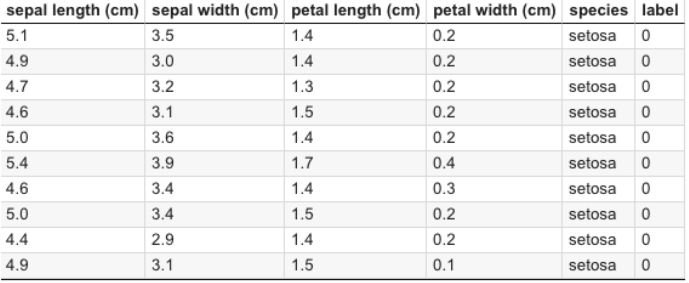

sepal（がく⽚）とpetal（花弁）の⻑さ・幅、およびアヤメの種類（species）と種類番号（label）がある。

このデータを⽤い、がく⽚と花弁の⻑さ・幅からアヤメ
の種類を分類する予測モデルを構築する。

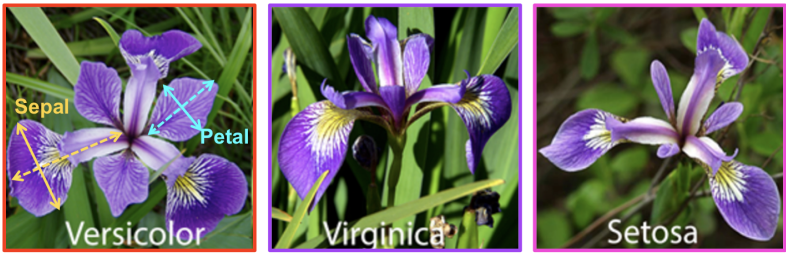

各列間の散布図を描く pandas.plotting.scatter_matrix 関数を⽤いて可視化を⾏い、

データを確認する。


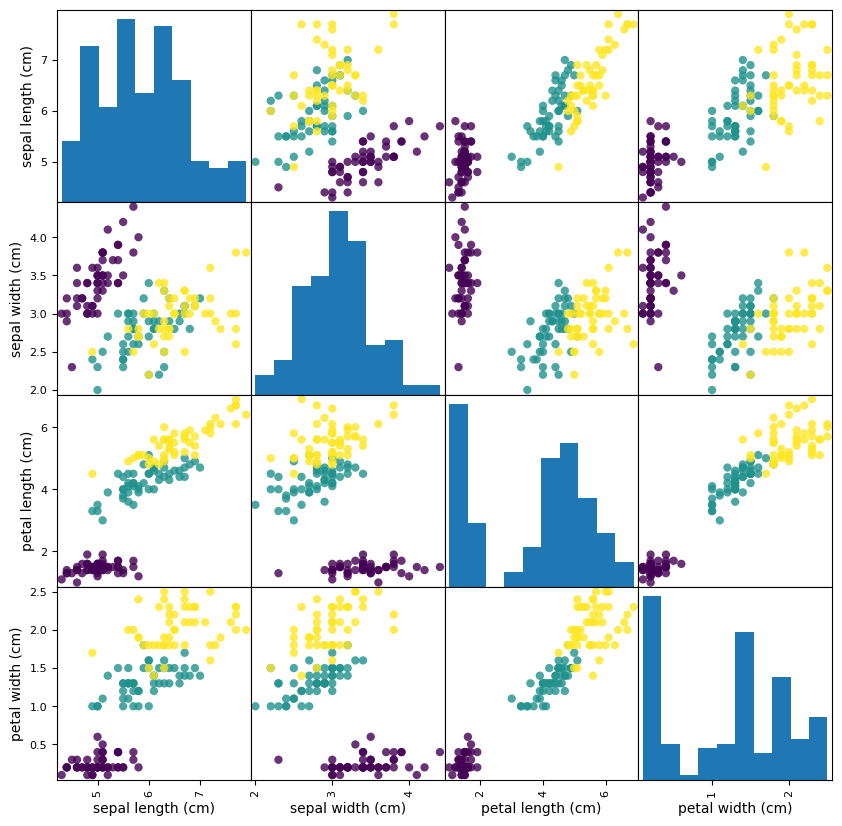

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("iris.csv")
pd.plotting.scatter_matrix(df.drop("label", axis=1), c = df["label"], figsize=(10, 10), marker='o', alpha=0.8)
plt.show()

## 2-3. 訓練データとテストデータの分割

教師あり学習における予測モデルは、未知のデータに対しても予測できなければ価値が低い。

統計学におけるモデルは既存のデータを正しく説明することが⽬的となるが、

教師あり学習は将来新しく得られる未知のデータを正しく予測するという⽬的が主となる。


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("iris.csv")

# 目的変数はlabel列のような数値列を用いる。species列は不要となるため削除する。
df = df.drop("species", axis=1)

# 訓練データとテストデータに分割。そのリストが返される。
split_data = train_test_split(df.drop("label", axis=1), df["label"], test_size = 50, random_state = 0)
X_train = split_data[0]
X_test = split_data[1]
y_train = split_data[2]
y_test = split_data[3]

# 下記と同等
# X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis=1), df["label"], test_size = 50, random_state = 0)

# それぞれ先頭5件のみ表示
print(X_train[:5])
print(y_train[:5])
print(X_test[:5])
print(y_test[:5])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
69                 5.6               2.5                3.9               1.1
135                7.7               3.0                6.1               2.3
56                 6.3               3.3                4.7               1.6
80                 5.5               2.4                3.8               1.1
123                6.3               2.7                4.9               1.8
69     1
135    2
56     1
80     1
123    2
Name: label, dtype: int64
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5            

sklearn.model_selection に⽤意されている train_test_split 関数を⽤いることで

訓練データとテストデータの分割ができる。

第１引数に説明変数となるデータ、

第２引数に⽬的変数となるデータ、

オプションで分割のサイズや乱数のシードが設定できる。

## 2-4. k-NN（k-最近傍法）で予測モデルを構築

シンプルな教師あり学習アルゴリズムにk-NN（k-最近傍法）がある。

k-NNは未知のデータが与えられた時に、訓練データの中から値が近い順にk個のデータを⽤いて予測を⾏う。

今回の例で⾔うと $k = 5$ のk-NNの場合、ある未知データを与えた際に、

その未知データと値が近い順のデータ5件を抽出し、そのラベルが $1, 1, 2, 1, 1$ などとなっていれば

 $1$ と予測する。

下記にk-NNを使った予測モデルを構築するコードを⽰す。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("iris.csv")
df = df.drop("species", axis=1)

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis=1), df["label"], test_size = 50, random_state = 0)

# k = 5でk-NNアルゴリズムの準備
knn = KNeighborsClassifier(n_neighbors = 5)

# 訓練データを用いて学習
knn.fit(X_train, y_train)

# 正解率の測定
score = knn.score(X_test, y_test)
print("test score: {}".format(score))

test score: 0.98


scikit-learnでは、どのアルゴリズムにも共通で .fit メソッドによる予測モデルの構築、 .score メソッドによる測定など同⼀のメソッドが使える。

そのため、⼀度慣れてしまえば下記の流れで簡単に予測モデルが構築できる。

1. train_test_split関数で訓練データとテストデータを作成
2. 何かの学習アルゴリズムを初期化
3. .fitメソッドで予測モデルの構築
4. .scoreメソッドで予測モデル精度の確認

ただし、今回のようなシンプルでないより現実的なデータセットの場合、精度を上げるために様々な⼯夫が必要となる。

逐次、その⼯夫について触れる。


## 2-5. ハイパーパラメータの調整

学習アルゴリズムの挙動を設定するために必要となるパラメータのことをハイパーパラメータと呼ぶ。

k-NNの場合、kの値（n_neighbors）がハイパーパラメー
タとなる。

より良い精度を得るためには、様々なハイパーパラメータを探索する必要がある。

例えば、下記のようにkの値を1〜10まで試すといったことを⾏う。


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("iris.csv")
df = df.drop("species", axis=1)

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis=1), df["label"], test_size = 50, random_state = 0)

# k = 1〜10でk-NN
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  print("k = {}, test score: {}".format(k, score))

k = 1, test score: 0.96
k = 2, test score: 0.96
k = 3, test score: 0.96
k = 4, test score: 0.96
k = 5, test score: 0.98
k = 6, test score: 0.98
k = 7, test score: 0.98
k = 8, test score: 0.98
k = 9, test score: 0.98
k = 10, test score: 0.98


シンプルなデータセットのためあまり差がでないが、

このようにより良い精度を得るためにハイパーパラメータを調整する。


## 2-6. 予測モデルの保存と読み込み

予測モデルを構築した後は、将来得る未知データに備えて学習済みモデルを再利⽤可能な形で保存する。

Pythonにはpickleというオブジェクトをファイルに保
存、読み込みできるモジュールがある。

下記はpickleによる学習済みモデルをファイルに保存するコードである。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv("iris.csv")
df = df.drop("species", axis=1)

X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis=1), df["label"], test_size = 50, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# 学習済みモデルをファイル出力
with open('iris_knn.model', 'wb') as f:
  pickle.dump(knn, f)


上記でk=5のk-NNによる学習済みモデルが iris_knn.model ファイルとして保存される。

このモデルを⽤いて新たな未知データを予測したい場合下記のように利⽤する。

In [ ]:
import pickle

# 学習済みモデルの読み込み
with open('iris_knn.model', 'rb') as f:
  model = pickle.load(f)

# 新しく取得した未知データ
data = [
  [5.1, 3.5, 1.4, 0.2],
  [5.9, 3.0, 5.1, 1.8],
  [3.5, 2.2, 3.3, 1.9]
]

# .predictメソッドで予測結果（数値ラベル）を得る
result = model.predict(data)
print(result)

# ラベルが0, 1, 2に対応する種類
species = ['setosa', 'versicolor', 'virginica']

# 予測結果の表示
for i in range(len(result)):
  print(species[result[i]])

[0 2 1]
setosa
virginica
versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


pickleで読み込んだオブジェクトはそのまま予測モデルのオブジェクトとして使うことができる。

予測モデルのオブジェクトは .predict メソッドを持っており、特徴量を渡すと予測結果を返す。

その結果を⽤いて未知データの予測が⾏える。

# 3. ボストンの住宅価格予測

先ほどの章では、アヤメ（iris）の種類を分類するタスクを⾏った。

教師あり学習のタスクの中でも分類と回帰に分けられる。

分類は⽬的変数がカテゴリやラベルなどになっており、

どのカテゴリやラベルに属するどうか予測するタスク。

回帰は⽬的変数が数値となっており、

その具体的な値を予測するタスク。

本章では、ボストン市における各地域の特徴を表す様々な特徴量をもとに、

その地域の住宅価格の中央値を予測する回帰のタスクに取り組む。


boston.csv は[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/boston.csv)からダウンロードできる。

## 3-1. 準備

データセットは、 boston.csv である。

ここでは、カレントディレクトリに設置されているものとする。

データの中⾝は次のようになっている。

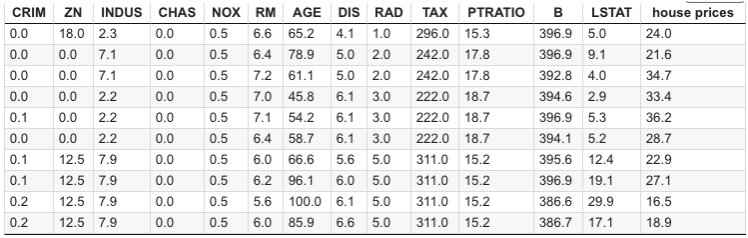

最終列の house prices が⽬的変数となっており、

この具体的な値を予測できるモデルを構築することが回帰のモデルとなる。

## 3-2. k-NN（k-最近傍法）で予測モデルを構築

先ほども使ったk-NNは回帰のタスクでも使えるアルゴリズムとなっている。

値が近い順にk個のデータの平均値を予測値として使う。

下記にk-NNによる予測モデルの構築を⾏うコードを⽰す。

回帰の場合は KNeighborsRegressor となる点に注意。

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv("boston.csv")

# 訓練データとテストデータの作成。デフォルトのテストデータのサイズは全体の25%。
X_train, X_test, y_train, y_test = train_test_split(df.drop("house prices", axis=1), df["house prices"], random_state = 0)

# k = 1〜10でk-NN
for k in range(1, 11):
  knn = KNeighborsRegressor(n_neighbors = k)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  print("k = {}, test score: {}".format(k, score))

k = 1, test score: 0.2513311025465419
k = 2, test score: 0.4557139084619136
k = 3, test score: 0.5102652286640108
k = 4, test score: 0.4830601188487641
k = 5, test score: 0.46508770467174354
k = 6, test score: 0.45086211557876743
k = 7, test score: 0.41056047765675574
k = 8, test score: 0.3891154643580289
k = 9, test score: 0.39939036900699765
k = 10, test score: 0.3856662828380175


分類では .score メソッドで得られる値は正解率であったが、回帰においては、決定係数となる。

決定係数とは、どれだけ⽬的変数を説明できているかを0.0〜1.0で表したもの。

1.0は予測結果と実際の値の誤差が全くない状態を意味する。

## 3-3. 特徴量選択

先ほどの結果を⾒ると、 $k = 3$ において $0.510$ が得られている。

良い結果かどうかはデータの質にも影響するため、⼀概には⾔えない。

使⽤する学習アルゴリズムやハイパーパラメータの調整でより良い結果が得られることもあれば、

そもそも良い精度が得られるデータセットでないこともある。


ただし、今回は学習のフェーズに問題がある。

k-NNは訓練データの中から値が似ているデータを⽤いて予測を⾏うが、

値が似ていても役に⽴たないどころか逆に精度を落としかねない要因が潜んでいる。


それは⽬的変数と相関がない説明変数の存在である。

k-NNにおいては、似ているデータの判断基準は単純に値の近さであるため、

相関がなくとも似ているデータと判断してしまう。

当然相関がなければ、予測結果に良い影響を与えない。


そこで、各説明変数と⽬的変数の相関係数を確認する。

下記コードのように、 データフレームオブジェクト.corr() で各列間の相関係数が得られるため、

これを使う。

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("boston.csv")

print(df.corr())

                  CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM          1.000000 -0.201095  0.406830 -0.056016  0.430225 -0.217634   
ZN           -0.201095  1.000000 -0.533903 -0.042697 -0.490074  0.311797   
INDUS         0.406830 -0.533903  1.000000  0.063190  0.757462 -0.389446   
CHAS         -0.056016 -0.042697  0.063190  1.000000  0.117430  0.092428   
NOX           0.430225 -0.490074  0.757462  0.117430  1.000000 -0.304896   
RM           -0.217634  0.311797 -0.389446  0.092428 -0.304896  1.000000   
AGE           0.352937 -0.569537  0.645048  0.086518  0.703518 -0.240052   
DIS          -0.380120  0.663669 -0.708160 -0.098976 -0.752567  0.203782   
RAD           0.625635 -0.311948  0.595284 -0.007368  0.608057 -0.209528   
TAX           0.582826 -0.314563  0.720787 -0.035587  0.651889 -0.291060   
PTRATIO       0.290301 -0.391679  0.383008 -0.121515  0.186818 -0.355961   
B            -0.385149  0.175522 -0.357076  0.048752 -0.372817  0.127248   
LSTAT       

この中で、 house prices （⽬的変数）と他の列（説明変数）の相関に注⽬すると、

相関のあるものからほとんどないものまであることがわかる。

⼀般に、相関係数の絶対値が0.5未満だとほとんど相関がない、あるいは弱い相関と捉えることが多い。


この結果を踏まえ、相関係数が0.5未満の説明変数を削除した上で同様の学習処理を⾏う。


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv("boston.csv")
# 相関係数0.5未満の列を削除
df = df.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B'], axis = 1)

# 訓練データとテストデータの作成
X_train, X_test, y_train, y_test = train_test_split(df.drop("house prices", axis=1), df["house prices"], random_state = 0)

# k = 1〜10でk-NN
for k in range(1, 11):
  knn = KNeighborsRegressor(n_neighbors = k)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  print("k = {}, test score: {}".format(k, score))

k = 1, test score: 0.5964089414150353
k = 2, test score: 0.6431290661131301
k = 3, test score: 0.6328600875052285
k = 4, test score: 0.6388252911980572
k = 5, test score: 0.644305816769956
k = 6, test score: 0.6380076012713907
k = 7, test score: 0.6393469094769895
k = 8, test score: 0.6404309543955742
k = 9, test score: 0.6435530386093118
k = 10, test score: 0.6425535717502844


0.64前後の決定係数が得られるようになっており、精度が向上していることがわかる。

このように、特徴量を正しく取捨選択することで精度向上が期待できる。

## 3-4. スケーリング

k-NNにおいて、似ている値についてもう⼀つ考慮すべき点がある。

それは、説明変数ごとに値の単位や⼤⼩が異なる場合があることである。

説明変数Aの100と101、説明変数Bの0.1と0.101があった場合、

どちらも1%の差だが、k-NNから⾒れば1の差と0.001の差と認識されるため、

それだけ似ている度合いに影響を与え、予測精度にも影響を与える。

そこで、標準化というスケーリングを⾏い、値の⼤⼩を整える。

標準化は各列の要素からその列の平均を引き、標準偏差で割る処理のこと。

これを⾏うことで、どの列も平均0、分散1のスケールで値が調整される。

標準化を⾏った上で学習を⾏うコードを下記に⽰す。

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("boston.csv")

# 相関係数0.5未満の列を削除
df = df.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B'], axis = 1)

# 訓練データとテストデータの作成
X_train, X_test, y_train, y_test = train_test_split(df.drop("house prices", axis=1), df["house prices"], random_state = 0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# k = 1〜10でk-NN
for k in range(1, 11):
  knn = KNeighborsRegressor(n_neighbors = k)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  print("k = {}, test score: {}".format(k, score))

k = 1, test score: 0.6283265573286996
k = 2, test score: 0.6529105041633092
k = 3, test score: 0.6534405047355587
k = 4, test score: 0.6662402313908938
k = 5, test score: 0.6734171651893384
k = 6, test score: 0.6803017111891356
k = 7, test score: 0.6798583068860582
k = 8, test score: 0.67911948021877
k = 9, test score: 0.6801526311451365
k = 10, test score: 0.6804834132795483


sklearn.preprocessing の StandardScaler を使うことで簡単に標準化が可能となる。

上記の17⾏⽬〜20⾏⽬が標準化処理にあたる。

結果を⾒ると、 0.68あたりまで精度が向上していることがわかる。

# 4. 教師あり学習のアルゴリズム

この章では、ここまでに使っていたk-NN（k-最近傍法）以外の

基本的な教師あり学習のアルゴリズムについていくつか説明する。

scikit-learnでは、基本的なメソッドが共通化されているので、

コードを少しを変えるだけで他のアルゴリズムを利⽤できる。

## 4-1. 線形回帰

線形回帰のアルゴリズムは

⽬的変数を $y$ 、

説明変数を $x_1, x_2, …$ 、

説明変数の係数を $w_1, w_2, …$ 、

定数を $b$ としたとき、

$y = b+w_1*x_1+w_2*x_2+…$ で近似するように学習する。

主に回帰のタスクで⽤いられる。ボストン住宅価格のデータを例にコードを⽰す。

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("boston.csv")

# 訓練データとテストデータの作成
X_train, X_test, y_train, y_test = train_test_split(df.drop("house prices", axis=1), df["house prices"], random_state = 0)

# 線形回帰による学習
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("test score: {}".format(score))

# 係数
print(model.coef_)

# 定数（切片）
print(model.intercept_)


test score: 0.6346261495682978
[-1.13481268e-01  4.68651008e-02 -2.99869127e-05  2.52956881e+00
 -1.20484695e+01  3.79219025e+00 -1.14995558e-02 -1.39511437e+00
  2.47981740e-01 -1.27374045e-02 -9.42396658e-01  8.66792613e-03
 -4.98012200e-01]
34.359997395714515


係数は .coef_ 、定数は intercept_ で参照可能。

## 4-2. 決定⽊
決定⽊は、説明変数の条件分岐を繰り返し予測結果を求める。

下記に、ある商品が今⽇売れるか売れないかを分類するイメージを⽰す。

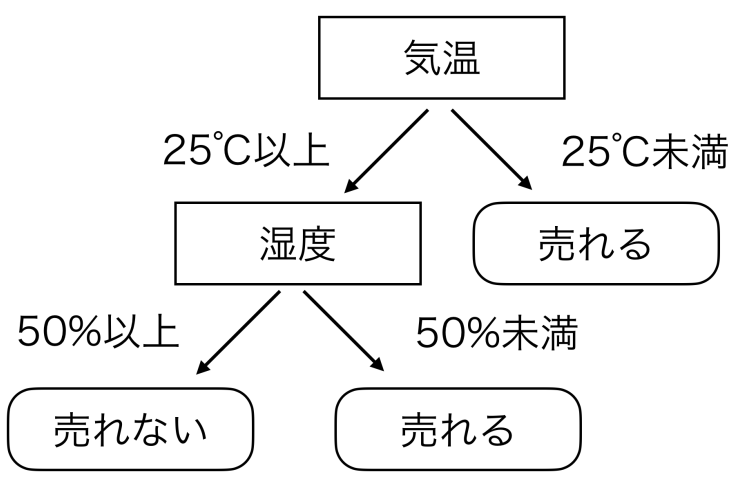

決定⽊は分類、回帰両⽅のタスクで⽤いられる。

また、分類のタスクでは分類⽊、回帰のタスクでは回帰⽊と呼ぶ。

アヤメとボストン住宅価格で例を⽰す。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv("iris.csv")
df = df.drop("species", axis=1)

X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis=1), df["label"], test_size = 50, random_state = 0)

# 木の最大深さ7で分類木を作成
model = DecisionTreeClassifier(max_depth= 7, random_state=0)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("test score: {}".format(score))

test score: 0.98


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("boston.csv")

# 訓練データとテストデータの作成
X_train, X_test, y_train, y_test = train_test_split(df.drop("house prices", axis=1), df["house prices"], random_state = 0)

# 木の最大深さ7で回帰木を作成
model = DecisionTreeRegressor(max_depth= 7, random_state=0)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("test score: {}".format(score))

test score: 0.6753193260980401


実は決定⽊はハイパーパラメータが多い。

そういった場合のチューニング⼿法については次回触れる。

ハイパーパラメータの情報は公式サイトが参考になる。

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

## 4-3. サポートベクターマシン

サポートベクターマシンは主に分類のタスクで使われるアルゴリズムで、

分類におけるデータの境界線をそれぞれのデータから最も遠くなるように線引きするように学習を⾏う。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

df = pd.read_csv("iris.csv")
df = df.drop("species", axis=1)

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis=1), df["label"], test_size = 50, random_state = 0)

# サポートベクターマシンによる分類
model = SVC()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("test score: {}".format(score))

test score: 0.98


データセットのボリュームが多い場合は、 LinearSVC を使うことが推奨されている。

このアルゴリズムもハイパーパラメータが多いため、公式サイトを参考。

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


# 5. 演習および課題

## 5-1. 演習

### 演習1

ワインに関するデータセット wine.csv を⽤い、ワインのクラスを分類する予測モデルを作成せよ。

class 列にクラスを意味する 0 1 2 のいずれかがあ
る。

train_test_split関数は test_size = 50 、 random_state = 0 とする。


wine.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/wine.csv)からダウンロードできる

### 演習2
年齢などの情報と⾎液の検査情報に関するデータセット diabetes.csv を⽤い、

糖尿病の進⾏度を予測するモデルを作成せよ。

Diabetes Progress 列が糖尿病の進⾏度を意味する。

s1〜s6列は⾎液の検査情報を意味する。

また、このデータセットの特徴量はすでにスケーリング処理が施されている。

train_test_split関数は test_size = 100 、 random_state = 0 とする。



diabetes.csv は[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/diabetes.csv)からダウンロードできる

## 5-2. 課題

### 課題1
演習のタスクにおいて、特徴量選択やスケーリング処理、ハイパーパラメータの調整、

適切なアルゴリズムの選択を⾏い、モデルの精度を可能な限り⾼めよ。

学習済みモデルをpickleと使い出⼒し、そのモデルを提出せよ。